In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys
sys.version

'3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]'

In [7]:
chunksize = 50000

tp = pd.read_csv(
    '..\\pisa2012.csv',
    encoding='latin1',
    index_col=0,
    dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str},
    iterator=True,
    chunksize=chunksize
)

df_list = []

for df in tp:
    df = df.rename(columns={
                'CNT': 'country',
                'STIDSTD': 'studentId',
                'ST01Q01': 'internationalGrade',
                'ST03Q01': 'birthMonth',
                'ST03Q02': 'birthYear',
                'ST04Q01': 'gender',
                'ST42Q02': 'notGoodMaths',
                'ST46Q06': 'payAttentionInClassesMath',
                'ST49Q01': 'talkAboutMaths',
                'ST49Q02': 'helpFriendsMaths',
                'ST49Q03': 'extracurricularActivity',
                'ST49Q04': 'participateInCompetitions',
                'ST49Q05': 'studyMoreThan2ExtraHoursADay',
                'ST49Q06': 'playChess',
                'ST49Q07': 'computerProgramming',
                'ST49Q09': 'participateInMathClub'
              })
    
    df_student_behavior = df[['country', 'studentId', 'internationalGrade', 'birthMonth', 'birthYear',
        'gender', 'notGoodMaths', 'payAttentionInClassesMath', 'talkAboutMaths', 'helpFriendsMaths', 
        'extracurricularActivity', 'participateInCompetitions', 'studyMoreThan2ExtraHoursADay','playChess',
        'computerProgramming', 'participateInMathClub']]
    
    df_list.append(df_student_behavior)
    
df_student_behavior = pd.concat(df_list)

In [8]:
df_student_behavior.info()
df_student_behavior.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 16 columns):
country                         485490 non-null object
studentId                       485490 non-null int64
internationalGrade              485490 non-null int64
birthMonth                      485490 non-null int64
birthYear                       485490 non-null int64
gender                          485490 non-null object
notGoodMaths                    313502 non-null object
payAttentionInClassesMath       312900 non-null object
talkAboutMaths                  313495 non-null object
helpFriendsMaths                313025 non-null object
extracurricularActivity         312168 non-null object
participateInCompetitions       312378 non-null object
studyMoreThan2ExtraHoursADay    312582 non-null object
playChess                       312571 non-null object
computerProgramming             312425 non-null object
participateInMathClub           312752 non-null object
dtypes: int64

,country,studentId,internationalGrade,birthMonth,birthYear,gender,notGoodMaths,payAttentionInClassesMath,talkAboutMaths,helpFriendsMaths,extracurricularActivity,participateInCompetitions,studyMoreThan2ExtraHoursADay,playChess,computerProgramming,participateInMathClub
1,Albania,1,10,2,1996,Female,Disagree,Agree,Often,Sometimes,Sometimes,Sometimes,Sometimes,Never or rarely,Never or rarely,Never or rarely
2,Albania,2,10,2,1996,Female,NaN,Agree,Sometimes,Often,Always or almost always,Sometimes,Always or almost always,Never or rarely,Never or rarely,Often
3,Albania,3,9,9,1996,Female,NaN,Agree,Sometimes,Always or almost always,Sometimes,Never or rarely,Always or almost always,Never or rarely,Never or rarely,Never or rarely


In [9]:
def show_unique_values(df, var_list):
    for var in var_list:
        print(var, ' Unique Values:\n', df[var].unique(), '\n')

show_unique_values(df_student_behavior, df_student_behavior.columns.tolist())

country  Unique Values:
 ['Albania' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bulgaria' 'Brazil' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'United Kingdom' 'Greece' 'Hong Kong-China' 'Croatia'
 'Hungary' 'Indonesia' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Jordan'
 'Japan' 'Kazakhstan' 'Korea' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Macao-China' 'Mexico' 'Montenegro' 'Malaysia' 'Netherlands'
 'Norway' 'New Zealand' 'Peru' 'Poland' 'Portugal' 'Qatar' 'China-Shanghai'
 'Perm(Russian Federation)' 'Florida (USA)' 'Connecticut (USA)'
 'Massachusetts (USA)' 'Romania' 'Russian Federation' 'Singapore' 'Serbia'
 'Slovak Republic' 'Slovenia' 'Sweden' 'Chinese Taipei' 'Thailand'
 'Tunisia' 'Turkey' 'Uruguay' 'United States of America' 'Vietnam'] 

studentId  Unique Values:
 [    1     2     3 ..., 33804 33805 33806] 

internationalGrade  Unique Values:
 [10  9  8 11  7 12 9

In [197]:
def get_variable_frequency(df, var):
    ## List of all possible values for frequency
    frequency_list = ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
    
    ## Grouping by country & variable and counting the occurrences
    df_ret = df.groupby(['country', var]).count()['internationalGrade'].reset_index()\
                .rename(columns={
                    var: 'frequency',
                    'internationalGrade': var
                })
        
    ## Turning the frequency variable into a 'category' so it becomes possible to define an order
    df_ret['frequency'] = df_ret['frequency'].astype('category')
    df_ret['frequency'].cat.reorder_categories(frequency_list,
                                                inplace=True)
    
    ## Verifying if there is any missing frequency element in these groups
    df_group = df_ret.groupby('country', as_index=False).count()
    country_list = df_group[df_group['frequency'] < len(frequency_list)]['country'].unique().tolist()
    
    ## For each country in the list of countries with missing frequency elements ...
    for country in country_list:
        ## ... Identifying missing elements ...
        missing_freq = list(set(frequency_list) - set(df_ret[df_ret['country'] == country]['frequency'].tolist()))
        
        ## ... Create a DataFrame with the missing elements associated to this Country and fill them with 0's ...
        missing_df = pd.DataFrame({'country': country, 'frequency': missing_freq, var: 0})
    
        ## ... Append 'missing_df' to the resultant
        df_ret = pd.concat([df_ret, missing_df], ignore_index=True)        
    
    ## Sort the DataFrame by contry & frequency
    df_ret.sort_values(by=['country', 'frequency'], ascending=[True, False], inplace=True)
    df_ret.reset_index(drop=True, inplace=True)
    
    return df_ret

def get_df_for_variables(df, var_list):
    ## For each variable, create a grouped DataFrame and concatenate it to the final one
    df_result = pd.concat([get_variable_frequency(df, var) for var in var_list], axis=1)
    
    ## Return the final DataFrame without duplicate columns
    return df_result[['country','frequency'] + var_list].T.drop_duplicates().T

In [13]:
df_student_behavior.columns[8:].tolist()

['talkAboutMaths',
 'helpFriendsMaths',
 'extracurricularActivity',
 'participateInCompetitions',
 'studyMoreThan2ExtraHoursADay',
 'playChess',
 'computerProgramming',
 'participateInMathClub']

In [196]:
df_ = get_variable_frequency(df_student_behavior, 'talkAboutMaths')

df_[df_['country'].str.contains('Lie')]

,country,frequency,talkAboutMaths
140,Liechtenstein,Always or almost always,7
141,Liechtenstein,Often,13
142,Liechtenstein,Sometimes,91
143,Liechtenstein,Never or rarely,82


In [222]:
var_list = df_student_behavior.columns[8:].tolist()

df_merge = get_df_for_variables(df_student_behavior, var_list)

df_melt = pd.melt(df_merge, id_vars=['country', 'frequency'], value_vars=var_list)

total_freq_per_country_var = df_melt.groupby(['country', 'variable'], as_index=False).sum()[['country', 'variable', 'value']]

df_proportion = df_melt.merge(total_freq_per_country_var, on=['country', 'variable'], how='inner')
df_proportion['count_percent'] = (df_proportion['value_x'] * 1. / df_proportion['value_y']) * 100
df_proportion['count_percent'] = df_proportion['count_percent'].astype(float).round(2)

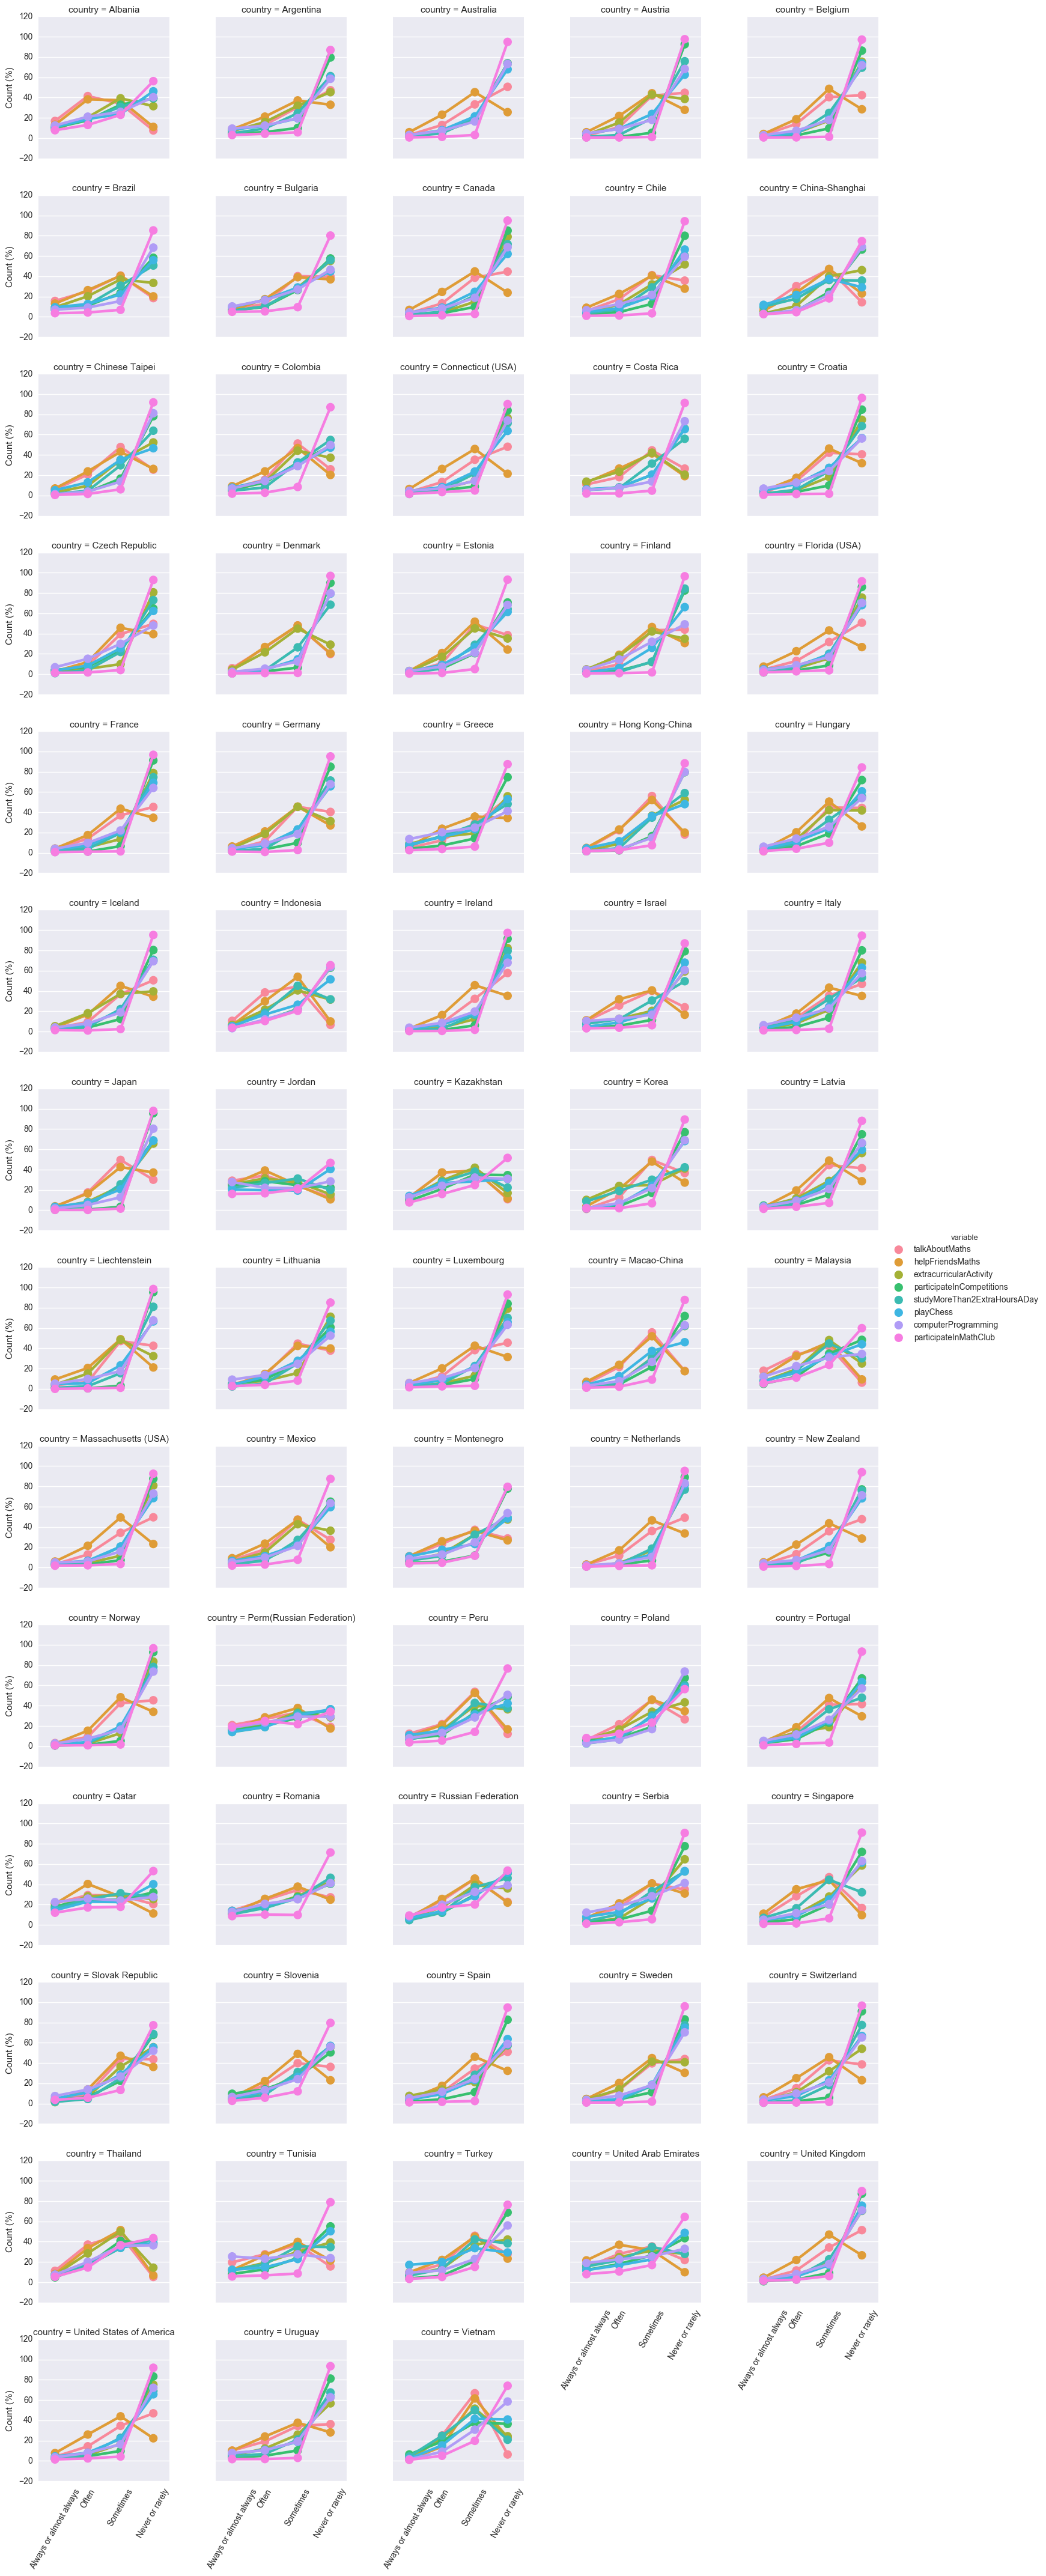

In [224]:
g = sns.factorplot(x='frequency', y='count_percent', hue='variable',
                   col='country', data=df_proportion, col_wrap=5, size=3, aspect=1)
g.set_xticklabels(rotation=60)
g.set_axis_labels('', 'Count (%)');